# Unsupervised Learning

## K Means Clustering

### Dataset

Seeds Data Set

http://archive.ics.uci.edu/ml/datasets/seeds

In [7]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00236/

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /ml/machine-learning-databases/00236</title>
 </head>
 <body>
<h1>Index of /ml/machine-learning-databases/00236</h1>
<ul><li><a href="/ml/machine-learning-databases/"> Parent Directory</a></li>
<li><a href="seeds_dataset.txt"> seeds_dataset.txt</a></li>
</ul>
<address>Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips SVN/1.7.14 Phusion_Passenger/4.0.53 mod_perl/2.0.11 Perl/v5.16.3 Server at archive.ics.uci.edu Port 80</address>
</body></html>


In [8]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

--2023-03-21 12:21:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-03-21 12:21:20 (137 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]



### Dependencies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Loading Dataset

In [10]:
# !sed -i "s/[\t]/,/g" seeds_dataset.txt 

In [11]:
# !rm seeds_dataset.txt

In [12]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
# df = pd.read_csv("seeds_dataset.txt", names=cols)

# For removing the tab spaces
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")

In [13]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry,groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [14]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [15]:
for col in cols:
  print(col , df[col].isnull().values.any())

area False
perimeter False
compactness False
length False
width False
asymmetry False
groove False
class False


### Plotting Each Feature Against Every Other

In [ ]:
for i in range(len(cols)-1):
  for j in range(len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]

    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()
    print()

### Clustering (Single Dimension)

In [17]:
x = 'perimeter'
y = 'asymmetry'
X = df[[x, y]].values

In [18]:
kmeans = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2], dtype=int32)

In [20]:
df['class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [21]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

### Visualizing

In [ ]:
# K Means Classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

In [ ]:
# Original Classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

### Higher Dimension

In [24]:
X = df[cols[:-1]].values

In [25]:
kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualizing


In [ ]:
# K Means Classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

In [ ]:
# Original Classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

## Principal Component Analysis

### Dependencies

In [28]:
from sklearn.decomposition import PCA

### Dimensionality Reduction

In [29]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [30]:
X.shape

(210, 7)

In [31]:
transformed_x.shape

(210, 2)

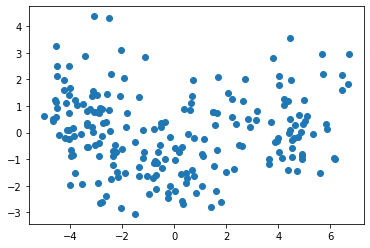

In [32]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

### Clustering and Visualizing

In [33]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [34]:
original_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [ ]:
# K Means Classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

In [ ]:
# Original Classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=original_pca_df)
plt.plot()